In [58]:
!pip install imbalanced-learn


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("bank_customer.csv")

In [3]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [11]:
df.head()

,ID,Gender,Month_Income,Age,Region_Code,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
0,VBENBARO,Male,96345.0,29,254,Other,623,Yes,4,742366,X1,2,No
1,CCMEWNKY,Male,85640.0,43,268,Other,629,NaN,0,925537,X2,1,No
2,VK3KGA9M,Male,96345.0,31,270,Salaried,357,No,0,215949,X1,1,No
3,TT8RPZVC,Male,85640.0,29,272,Other,356,No,0,868070,X1,3,No
4,SHQZEYTZ,Female,42820.0,29,270,Other,572,No,0,657087,X1,3,No


In [13]:
df.tail()

,ID,Gender,Month_Income,Age,Region_Code,Occupation,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Account_Category,Tenure_with_Bank,Lead_Outcome
104995,DXH8IPX5,Male,53525.0,27,280,Self_Employed,364,Yes,5,1168792,X1,2,No
104996,KCJVCFTF,Male,74935.0,55,284,Self_Employed,400,Yes,3,6150086,X2,2,No
104997,DAH8ST9U,Female,53525.0,31,268,Self_Employed,502,No,0,743897,X1,4,No
104998,HSAAXEVZ,Male,157875.0,47,283,Self_Employed,824,Yes,1,1918608,X3,9,Yes
104999,EMZ6N5ZT,Male,210500.0,49,276,Self_Employed,897,NaN,0,775955,X2,12,Yes


In [15]:
df.shape

(105000, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     105000 non-null  object 
 1   Gender                 105000 non-null  object 
 2   Month_Income           102514 non-null  float64
 3   Age                    105000 non-null  int64  
 4   Region_Code            105000 non-null  int64  
 5   Occupation             102486 non-null  object 
 6   Credit_Score           105000 non-null  int64  
 7   Loan_Status            92511 non-null   object 
 8   Existing_Credit_Cards  105000 non-null  int64  
 9   Avg_Account_Balance    105000 non-null  int64  
 10  Account_Category       105000 non-null  object 
 11  Tenure_with_Bank       105000 non-null  int64  
 12  Lead_Outcome           105000 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 10.4+ MB


In [19]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***" * 10)

ID
VBENBARO    1
BLZUEXVT    1
TSQ8837V    1
GRYHKCES    1
47LKWBXA    1
           ..
AQDBD3PJ    1
XQVM4TK3    1
4ETJYYJ7    1
A8YMAYWP    1
EMZ6N5ZT    1
Name: count, Length: 105000, dtype: int64
******************************
Gender
Male      57546
Female    47454
Name: count, dtype: int64
******************************
Occupation
Self_Employed    42027
Salaried         30066
Other            29343
Entrepreneur      1050
Name: count, dtype: int64
******************************
Loan_Status
No     61431
Yes    31080
Name: count, dtype: int64
******************************
Account_Category
X1    44338
X3    29191
X2    29097
X4     2374
Name: count, dtype: int64
******************************
Lead_Outcome
No     63605
Yes    41395
Name: count, dtype: int64
******************************


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month_Income,102514.0,1.015503e+05,45538.879021,42820.0,64230.0,94725.0,126300.0,210500.0
Age,105000.0,4.387538e+01,14.873280,24.0,30.0,43.0,54.0,85.0
Region_Code,105000.0,2.698330e+02,10.903446,250.0,261.0,269.0,280.0,284.0
Credit_Score,105000.0,6.026426e+02,180.611716,300.0,444.0,590.0,771.0,900.0
Existing_Credit_Cards,105000.0,1.204790e+00,2.119789,0.0,0.0,0.0,2.0,7.0
Avg_Account_Balance,105000.0,1.134120e+06,866371.377076,22597.0,603960.0,896470.0,1371552.0,9908858.0
Tenure_with_Bank,105000.0,5.748619e+00,4.098435,1.0,3.0,5.0,9.0,15.0


In [23]:
df.describe(include="object")

,ID,Gender,Occupation,Loan_Status,Account_Category,Lead_Outcome
count,105000,105000,102486,92511,105000,105000
unique,105000,2,4,2,4,2
top,VBENBARO,Male,Self_Employed,No,X1,No
freq,1,57546,42027,61431,44338,63605


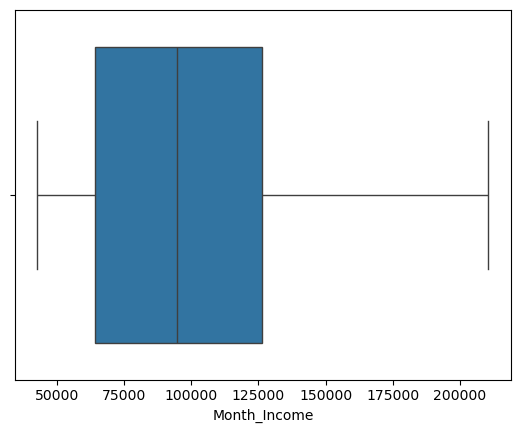

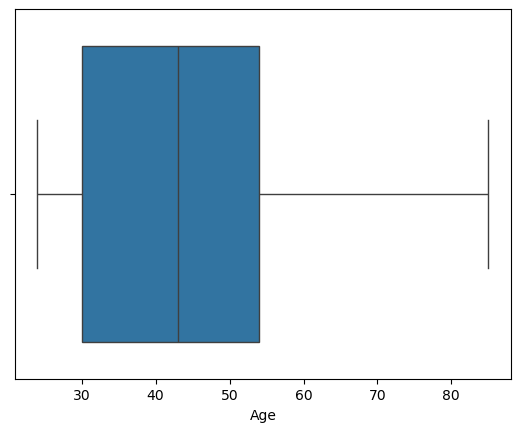

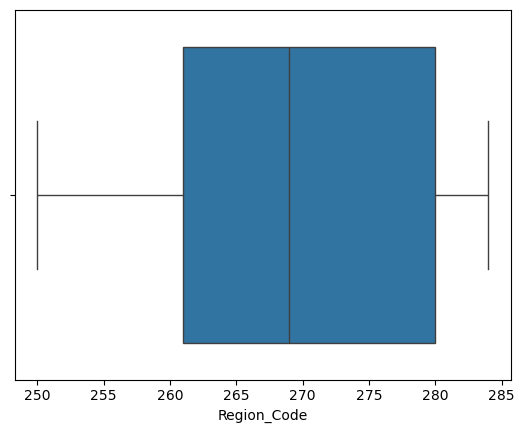

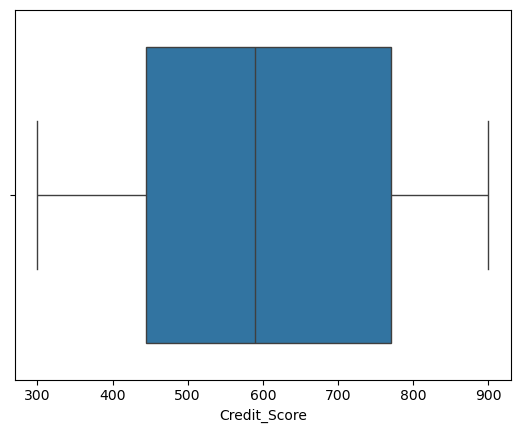

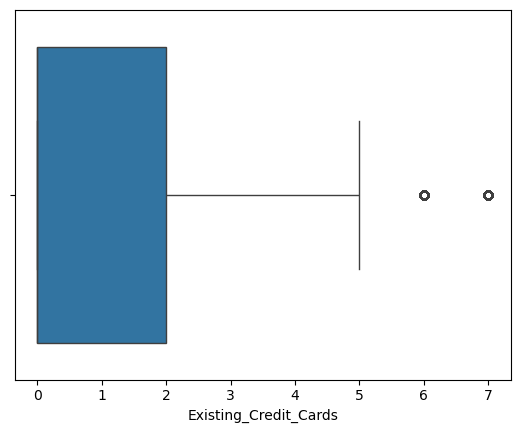

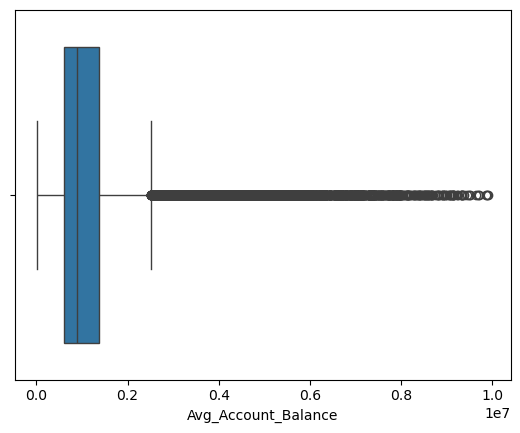

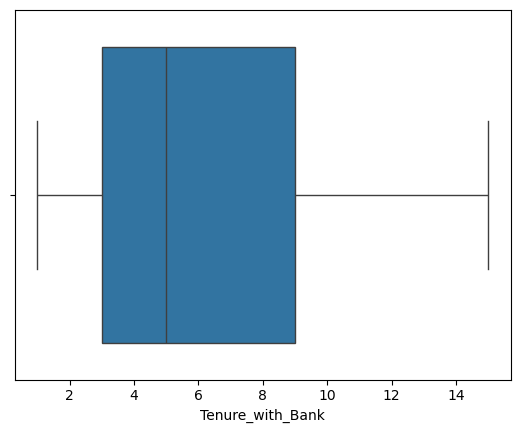

In [25]:
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [26]:
print(df.isnull().sum()) 

ID                           0
Gender                       0
Month_Income              2486
Age                          0
Region_Code                  0
Occupation                2514
Credit_Score                 0
Loan_Status              12489
Existing_Credit_Cards        0
Avg_Account_Balance          0
Account_Category             0
Tenure_with_Bank             0
Lead_Outcome                 0
dtype: int64


In [29]:
df['Month_Income'].fillna(df['Month_Income'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Loan_Status'].fillna(df['Loan_Status'].mode()[0], inplace=True)

In [31]:
print(df.isnull().sum()) 

ID                       0
Gender                   0
Month_Income             0
Age                      0
Region_Code              0
Occupation               0
Credit_Score             0
Loan_Status              0
Existing_Credit_Cards    0
Avg_Account_Balance      0
Account_Category         0
Tenure_with_Bank         0
Lead_Outcome             0
dtype: int64


In [33]:
df.duplicated().sum()

0

In [35]:
# Drop unnecessary columns
df.drop(['ID', 'Region_Code'], axis=1, inplace=True)

In [37]:
# Separate numerical and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

In [39]:
# One-hot encoding 
df_encoded = pd.get_dummies(df, columns=['Occupation', 'Account_Category'], drop_first=True)


In [41]:
#label encoding
le = LabelEncoder()
binary_columns = ['Gender', 'Loan_Status','Lead_Outcome']
for col in binary_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [43]:
df_encoded.head()

,Gender,Month_Income,Age,Credit_Score,Loan_Status,Existing_Credit_Cards,Avg_Account_Balance,Tenure_with_Bank,Lead_Outcome,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Account_Category_X2,Account_Category_X3,Account_Category_X4
0,1,96345.0,29,623,1,4,742366,2,0,True,False,False,False,False,False
1,1,85640.0,43,629,0,0,925537,1,0,True,False,False,True,False,False
2,1,96345.0,31,357,0,0,215949,1,0,False,True,False,False,False,False
3,1,85640.0,29,356,0,0,868070,3,0,True,False,False,False,False,False
4,0,42820.0,29,572,0,0,657087,3,0,True,False,False,False,False,False


In [45]:
features = df_encoded.drop('Lead_Outcome', axis=1)
target = df_encoded['Lead_Outcome']

In [47]:
print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")

Features shape: (105000, 14)
Target shape: (105000,)


In [53]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)


In [55]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [57]:
# Initialize and train the SVM model
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [58]:
# Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8151481801745146
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     12678
           1       0.89      0.72      0.80     12764

    accuracy                           0.82     25442
   macro avg       0.83      0.82      0.81     25442
weighted avg       0.83      0.82      0.81     25442

